In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from gensim.models import Word2Vec
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importing the dataset
df = pd.read_csv("/content/drive/MyDrive/Doceree/Doceree-HCP_Train.csv",encoding = "ISO-8859-1")
df.index=df.ID
df.shape

(113937, 14)

In [4]:
# Importing the dataset
df_test = pd.read_csv("/content/drive/MyDrive/Doceree/Doceree-HCP_Test.csv")
df_test.index=df_test.ID
df_test.shape

(28493, 12)

In [5]:
df.head(2)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
ID,,,,,,,,,,,,,,
1001,1001,Desktop,2,170.173.0.22,6974dcaa-f932-480e-9fb5-c52e20e1393a,Portland,97206.0,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/canc...,General|Endocrine|False|Medicine|Surgery|Urolo...,NaN,0.0
1002,1002,Desktop,2,65.216.253.25,c12f3f8f-8fcf-484a-90e1-1ac04db8cdcf,Arlington,22202.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,Online Medical Journal,Website,https://www.cancertherapyadvisor.com/home/deci...,Bone Marrow|Radiography|Chronic|Oncology|Psych...,NaN,0.0


In [6]:
df_test.head(2)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS
ID,,,,,,,,,,,,
115501,115501,Desktop,2,75.189.231.103,0d5041ff-f0b6-4d1a-9ad7-0a29f7d485b4,Fayetteville,28305.0,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_6...,Online Medical Journal,Website,https://www.clinicaladvisor.com/home/features/...,Family Practice|Drainage|Clinical|Dermatology|...
115502,115502,Mobile,2,24.101.33.158,c8396dd0-969f-4d99-a40b-b7bb1f516154,Conneaut Lake,16316.0,Mozilla/5.0 (iPhone; CPU iPhone OS 15_6_1 like...,Online Medical Journal,Website,https://www.ophthalmologyadvisor.com/topics/ca...,General|Clinical|Operative|Medicine|Cardiology...


###Visualisation


<Axes: >

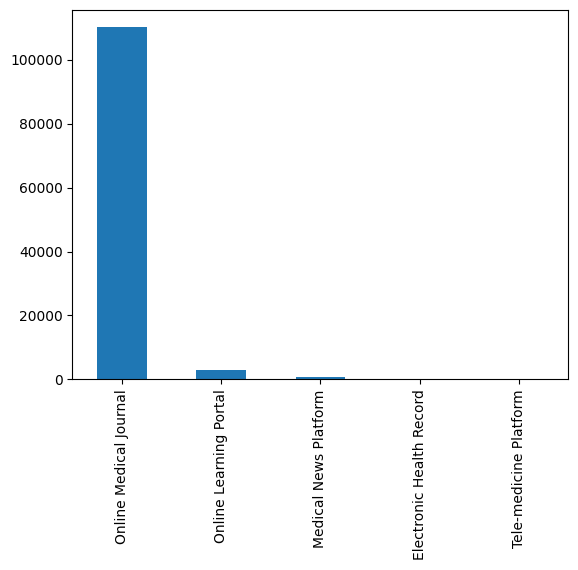

In [7]:
df['PLATFORMTYPE'].value_counts().plot(kind="bar")

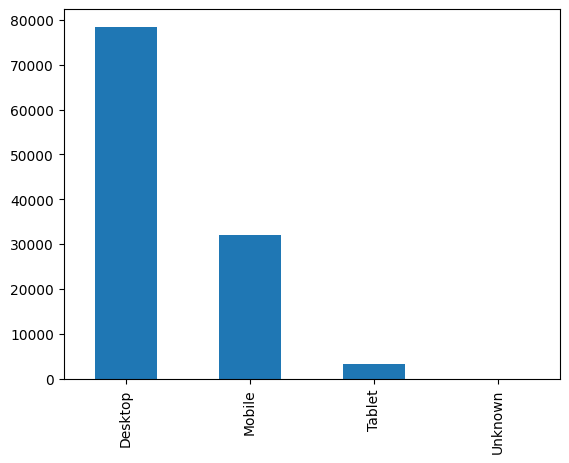

In [8]:
def bar_graph(feature):
    df[feature].value_counts().plot(kind="bar")
bar_graph('DEVICETYPE')

In [9]:
sentences = df['KEYWORDS'].apply(lambda x: x.split("|"))
sentences

ID
1001      [General, Endocrine, False, Medicine, Surgery,...
1002      [Bone Marrow, Radiography, Chronic, Oncology, ...
1003      [General, Endocrine, False, Medicine, Surgery,...
1004      [Dental, Total, Clinical, Pharmacology, Physic...
1005      [Critical Care, Emergency Medicine, General Pr...
                                ...                        
114933    [Cardiovascular, Clinical, False, Male, Oncolo...
114934    [Asthma, Arthritis, General, Clinical, Diagnos...
114935    [Rehabilitation, Transplantation, Clinical, Pr...
114936    [pain, disease, autoimmune, multiple sclerosis...
114937    [Genetic, Large, Autoimmune, Health, False, Ab...
Name: KEYWORDS, Length: 113937, dtype: object

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


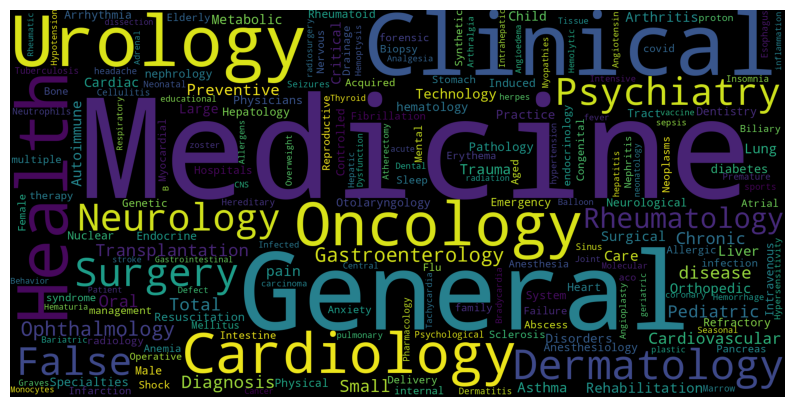

In [10]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from wordcloud import WordCloud

stop_words = set(stopwords.words('english'))

all_words = list([a for b in sentences.tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

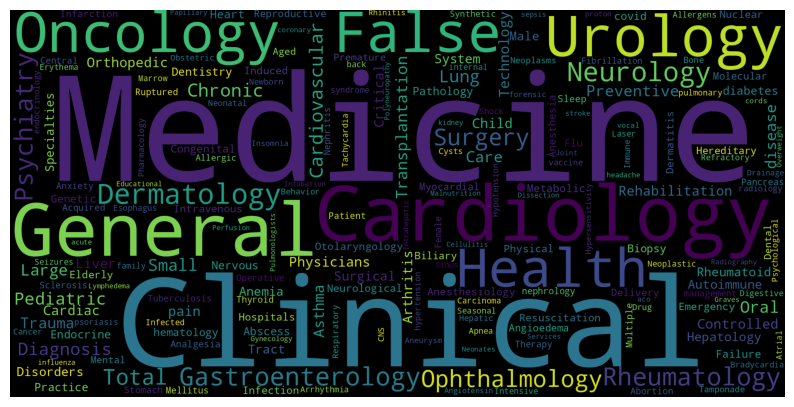

In [11]:
import matplotlib.pyplot as plt

stop_words = set(stopwords.words('english'))

# Filter the sentences based on IS_HCP=1 condition
hcp_sentences = sentences[df['IS_HCP'] == 1]

# Concatenate the sentences into a single string
all_words = list([a for b in hcp_sentences.tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

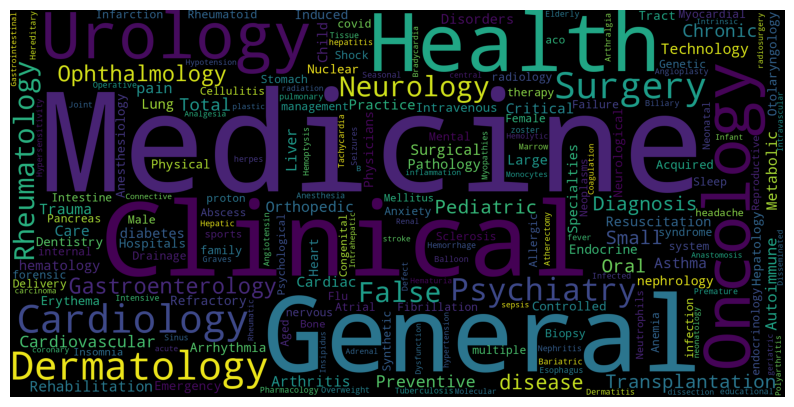

In [12]:
stop_words = set(stopwords.words('english'))

# Filter the sentences based on IS_HCP=1 condition
hcp_sentences = sentences[df['IS_HCP'] == 0]

# Concatenate the sentences into a single string
all_words = list([a for b in hcp_sentences.tolist() for a in b])
all_words_str = ' '.join(all_words)

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud)
    plt.axis("off")

wordcloud = WordCloud(width=2000, height=1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

### EDA

In [13]:
# filling na values
df['USERZIPCODE'].fillna(df["USERZIPCODE"].mode()[0],inplace=True)
df['USERCITY'].fillna("UNKNOWN",inplace=True)

df_test['USERZIPCODE'].fillna(df["USERZIPCODE"].mode()[0],inplace=True)
df_test['USERCITY'].fillna("UNKNOWN",inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113937 entries, 1001 to 114937
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ID               113937 non-null  int64  
 1   DEVICETYPE       113937 non-null  object 
 2   PLATFORM_ID      113937 non-null  int64  
 3   BIDREQUESTIP     113937 non-null  object 
 4   USERPLATFORMUID  113933 non-null  object 
 5   USERCITY         113937 non-null  object 
 6   USERZIPCODE      113937 non-null  float64
 7   USERAGENT        113935 non-null  object 
 8   PLATFORMTYPE     113937 non-null  object 
 9   CHANNELTYPE      113937 non-null  object 
 10  URL              113937 non-null  object 
 11  KEYWORDS         113937 non-null  object 
 12  TAXONOMY         32313 non-null   object 
 13  IS_HCP           113936 non-null  float64
dtypes: float64(2), int64(2), object(10)
memory usage: 13.0+ MB


In [14]:
print("TRAIN COLUMNS")
print(df.columns)

print("\n\nTEST COLUMNS")
print(df_test.columns)

TRAIN COLUMNS
Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL', 'KEYWORDS', 'TAXONOMY', 'IS_HCP'],
      dtype='object')


TEST COLUMNS
Index(['ID', 'DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
       'USERCITY', 'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
       'URL', 'KEYWORDS'],
      dtype='object')


In [15]:
# Dropping missing is_hcp rows
df = df.dropna(subset=['IS_HCP'])
df['IS_HCP'].value_counts()

0.0    79756
1.0    34180
Name: IS_HCP, dtype: int64

In [16]:
# Label Encoding both train and test
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

# LABEL ENCODING TAXONOMY
label_encoder_tax = LabelEncoder()
df['TAXONOMY'] = label_encoder_tax.fit_transform(df['TAXONOMY'])


# LABEL ENCODING OTHER CLOUMNS
label_encoder = LabelEncoder()
columns = ['DEVICETYPE','BIDREQUESTIP', 'USERPLATFORMUID', 'USERCITY',
           'USERZIPCODE', 'USERAGENT', 'PLATFORMTYPE', 'CHANNELTYPE',
          'URL', 'KEYWORDS']

# MERGING TRAIN AND TEST FOR LABEL ENCODING
merged_df = pd.concat([df, df_test],axis=0)

for col in columns:
  merged_df[col] = label_encoder.fit_transform(merged_df[col])
  merged_df[col] = merged_df[col].astype(int)

In [17]:
merged_df.head()

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
ID,,,,,,,,,,,,,,
1001,1001,0,2,7194,26134,3276,9235,3100,3,0,746,474,207.0,0.0
1002,1002,0,2,21236,47842,132,2282,2913,3,0,789,111,207.0,0.0
1003,1003,0,2,21730,41220,2783,7850,2913,3,0,746,474,207.0,0.0
1004,1004,0,3,4614,17268,4124,10150,3191,3,0,394,282,149.0,1.0
1005,1005,1,7,11084,39893,1821,7268,4371,3,0,1764,266,207.0,0.0


In [18]:
# SPLITTING MERGED DF back into TRAIN_DF
df = merged_df.iloc[:len(df)]
df.shape

(113936, 14)

In [19]:
# SPLITTING MERGED DF back into TEST_DF
df_test = merged_df.iloc[len(df):]
df_test.shape

(28493, 14)

In [20]:
df.head(2)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
ID,,,,,,,,,,,,,,
1001,1001,0,2,7194,26134,3276,9235,3100,3,0,746,474,207.0,0.0
1002,1002,0,2,21236,47842,132,2282,2913,3,0,789,111,207.0,0.0


In [21]:
df_test.head(2)

,ID,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERCITY,USERZIPCODE,USERAGENT,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,TAXONOMY,IS_HCP
ID,,,,,,,,,,,,,,
115501,115501,0,2,32162,3285,1290,2756,2706,3,0,941,420,NaN,NaN
115502,115502,1,2,16246,49642,826,1653,4159,3,0,4740,464,NaN,NaN


In [22]:
# Preparing Dataset for IS_HCP Model
is_hcp_data = df

# Preparing Dataset for TAXONOMY Model
taxonomy_data = df

In [23]:
is_hcp_data.shape, taxonomy_data.shape

((113936, 14), (113936, 14))

### IS_HCP Prediction

In [24]:
# GETTING DATA TO SPLIT AND PASS IN MODEL
# columns exclusind ID
# featured_columns = ['DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS']
featured_columns = ['DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS']
x = is_hcp_data[featured_columns]
y = df['IS_HCP']

# testing data
testing = df_test[featured_columns]

In [25]:
x.shape, x.columns

((113936, 8),
 Index(['DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID',
        'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS'],
       dtype='object'))

In [26]:
testing.shape

(28493, 8)

In [27]:
y.value_counts()

0.0    79756
1.0    34180
Name: IS_HCP, dtype: int64

In [28]:
x.head(2)

,DEVICETYPE,PLATFORM_ID,BIDREQUESTIP,USERPLATFORMUID,USERAGENT,PLATFORMTYPE,URL,KEYWORDS
ID,,,,,,,,
1001,0,2,7194,26134,3100,3,746,474
1002,0,2,21236,47842,2913,3,789,111


In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2, stratify=df['IS_HCP'])

In [30]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import StratifiedKFold
# import matplotlib.pyplot as plt
# from sklearn.model_selection import RandomizedSearchCV

# model = XGBClassifier()
# n_estimators = range(100, 800, 100)
# param_grid = dict(n_estimators=n_estimators)
# kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)
# random_search = RandomizedSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=80, cv=kfold)
# random_result = random_search.fit(X_train, y_train)

# # summarize results
# print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
# means = random_result.cv_results_['mean_test_score']
# stds = random_result.cv_results_['std_test_score']
# params = random_result.cv_results_['params']
# for mean, stdev, param in zip(means, stds, params):
#  print("%f (%f) with: %r" % (mean, stdev, param))

# # plot
# plt.errorbar(n_estimators, means, yerr=stds)
# plt.title("XGBoost n_estimators vs Log Loss")
# plt.xlabel('n_estimators')
# plt.ylabel('Log Loss')

In [31]:
# FOR TRYING
from xgboost import XGBClassifier

bst = XGBClassifier(n_estimators=500, n_jobs=80, objective='binary:logistic')
# fit model
bst.fit(X_train, y_train)
# make predictions
y_pred = bst.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix: ")
confusion_matrix(y_test, y_pred)

Accuracy: 0.9972353870458136

Confusion Matrix: 


array([[15928,    24],
       [   39,  6797]])

In [32]:
xgOutput = bst.predict(testing)
xgOutput

array([0, 1, 0, ..., 0, 0, 0])

In [33]:
output = pd.DataFrame({'ID':df_test.ID,'IS_HCP':xgOutput})
output['IS_HCP'].value_counts()

0    20057
1     8436
Name: IS_HCP, dtype: int64

In [34]:
# output.to_csv("output-XGBoost.csv",index=False)
# output.columns

### TAXONOMY Pred

In [35]:
# GETTING DATA TO SPLIT AND PASS IN MODEL
# featured_columns = ['DEVICETYPE', 'PLATFORM_ID', 'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS']
# featured_columns = ['DEVICETYPE', 'PLATFORM_ID', 'BIDREQUESTIP', 'USERPLATFORMUID', 'USERAGENT', 'PLATFORMTYPE', 'URL', 'KEYWORDS']-91.72RF
featured_columns = ['DEVICETYPE', 'BIDREQUESTIP', 'USERZIPCODE', 'PLATFORMTYPE', 'CHANNELTYPE',  'URL', 'KEYWORDS']
# featured_columns = ['DEVICETYPE', 'PLATFORMTYPE', 'CHANNELTYPE',  'URL', 'KEYWORDS']
# featured_columns = ['DEVICETYPE', 'BIDREQUESTIP', 'PLATFORMTYPE', 'USERAGENT', 'CHANNELTYPE',  'URL', 'KEYWORDS'] - 92.41 RF
x = taxonomy_data[featured_columns]
x['IS_HCP'] = df['IS_HCP']
y = df['TAXONOMY']

# testing data
testing = df_test[featured_columns]
testing['IS_HCP'] = xgOutput

In [36]:
x.head(3)

,DEVICETYPE,BIDREQUESTIP,USERZIPCODE,PLATFORMTYPE,CHANNELTYPE,URL,KEYWORDS,IS_HCP
ID,,,,,,,,
1001,0,7194,9235,3,0,746,474,0.0
1002,0,21236,2282,3,0,789,111,0.0
1003,0,21730,7850,3,0,746,474,0.0


In [37]:
x.shape, y.shape

((113936, 8), (113936,))

In [38]:
testing.shape

(28493, 8)

In [39]:
# # Random Search CV

# from sklearn.model_selection import train_test_split, RandomizedSearchCV
# import multiprocessing

# # Define hyperparameters to tune
# param_dist = {
#     'n_estimators': [50, 100, 150],    # Number of trees in the forest
#     'max_depth': [None, 10, 20],       # Maximum depth of the tree
#     'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
# }

# # Create the RandomizedSearchCV to find the best hyperparameters
# n_iter_search = 10  # Adjust the number of random combinations to explore
# random_search = RandomizedSearchCV(rf_classifier, param_distributions=param_dist, n_iter=n_iter_search,
#                                    cv=5, scoring='accuracy', n_jobs=multiprocessing.cpu_count() - 1,
#                                    random_state=42)

# # Fit the RandomizedSearchCV on the training data to find the best hyperparameters
# random_search.fit(x, y)

# # Get the best hyperparameters and the best model
# best_params = random_search.best_params_
# best_model = random_search.best_estimator_

In [40]:
best_params = {'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': None}

best_model = RandomForestClassifier(n_estimators=50, random_state=42)

In [41]:
best_params, best_model

({'n_estimators': 50,
  'min_samples_split': 2,
  'min_samples_leaf': 1,
  'max_depth': None},
 RandomForestClassifier(n_estimators=50, random_state=42))

In [42]:
model = RandomForestClassifier(n_estimators=300, random_state=42)
# model = XGBClassifier()
# model = XGBClassifier(n_estimators=500, n_jobs=80)
model.fit(x, y)

RandomForestClassifier(n_estimators=300, random_state=42)

In [43]:
layer_data = testing
y_pred_tax = model.predict(layer_data)
len(y_pred_tax)

28493

In [44]:
y_pred_tax = y_pred_tax.astype(int)
y_pred_tax

array([207, 149, 207, ..., 207, 207, 207])

In [45]:
decoded_labels = label_encoder_tax.inverse_transform(y_pred_tax)
print(decoded_labels)

[nan '2084P0800X' nan ... nan nan nan]


In [46]:
taxo_pred = pd.DataFrame({'ID': df_test['ID'],'TAXONOMY': decoded_labels})
taxo_pred['TAXONOMY'] = taxo_pred['TAXONOMY'].fillna(-1)
taxo_pred.to_csv('taxo_output.csv', index=False)

In [47]:
result = pd.DataFrame({'ID': df_test['ID'],'TAXONOMY': decoded_labels, 'IS_HCP': xgOutput})
result['TAXONOMY'] = result['TAXONOMY'].fillna(-1)
result.to_csv('hcp_taxo_output.csv', index=False)

### LazyPredict to see how different algorithms perform on given data

In [48]:
# !pip install lazypredict

In [49]:
# from lazypredict.Supervised import LazyClassifier

# X_train,X_test,y_train,y_test = train_test_split(x, y, test_size=0.2)

# clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
# models,predictions = clf.fit(X_train, X_test, y_train, y_test)

# print(models)